# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets, linear_model
import statsmodels.stats.api as sms
import numpy as np

%matplotlib inline
sns.set(color_codes= True)
sns.mpl.rc("figure", figsize=(6, 4))

df = pd.read_csv('human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


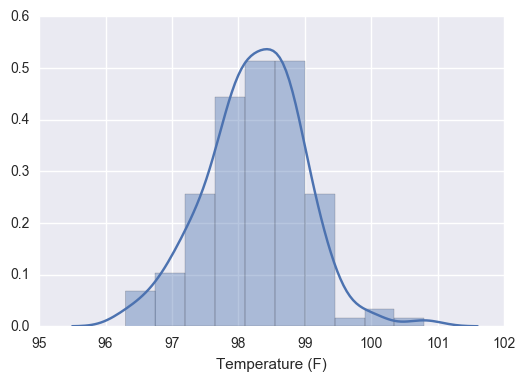

In [5]:
sns.distplot(df.temperature,  kde= True, bins = 10, rug= False)
plt.xlabel('Temperature (F)')

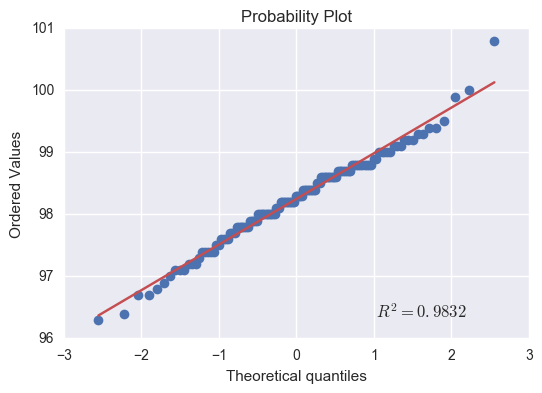

In [6]:
stats.probplot(df.temperature, dist = 'norm', fit=True, plot = plt, rvalue=True)
plt.show()
# probability plot of sample data against the quantiles of a normal distribution

In [7]:
stats.shapiro(df.temperature) 
# Shapiro Wilk normality test

(0.9865770936012268, 0.233174666762352)

In [8]:
sms.ztest(df.temperature, value=98.6, alternative='two-sided') 
# z-test

(-5.4548232923645195, 4.9021570141012155e-08)

In [9]:
stats.ttest_1samp(df.temperature, 98.6) 
# t-test

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [10]:
stats.norm.interval(0.95, loc=np.mean(df.temperature), scale=np.std(df.temperature)/np.sqrt(len(df.temperature)))
# confidence interval

(98.123682111456645, 98.37477942700491)

In [11]:
norm_temp = stats.mstats.normaltest(df.temperature, axis=0)
p_temp = str(norm_temp[1])
print('Body temperature is normally distributed')
print('p = ' + p_temp)

norm_hr = stats.mstats.normaltest(df.heart_rate, axis=0)
p_hr = str(norm_hr[1])
print('Heart rate is normally distributed')
print('p = ' + p_hr)

Body temperature is normally distributed
p = 0.258747986349
Heart rate is normally distributed
p = 0.308989787248


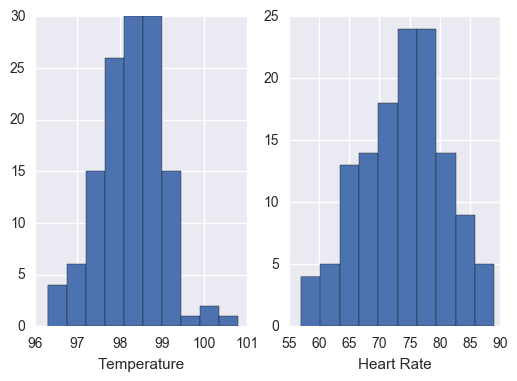

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.hist(df.temperature)
ax1.set_xlabel('Temperature')
ax2.hist(df.heart_rate)
ax2.set_xlabel('Heart Rate')
plt.show()

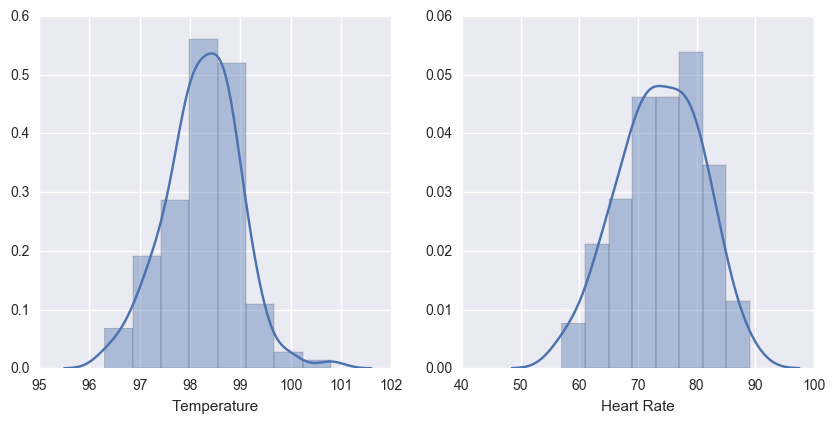

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(df.temperature, kde=True, bins = 8, rug=False)
plt.xlabel('Temperature')
plt.subplot(222)
sns.distplot(df.heart_rate, kde=True, bins = 8, rug=False)
plt.xlabel('Heart Rate')
plt.show()

## 2. Is the sample size large? Are the observations independent?

In [14]:
print('The total sample size is '+  str(df.shape[0]) + ' i.e. is greater than 30 and therefore considered acceptable.')

The total sample size is 130 i.e. is greater than 30 and therefore considered acceptable.


stats.chisquare([16, 18, 16, 14, 12, 12])

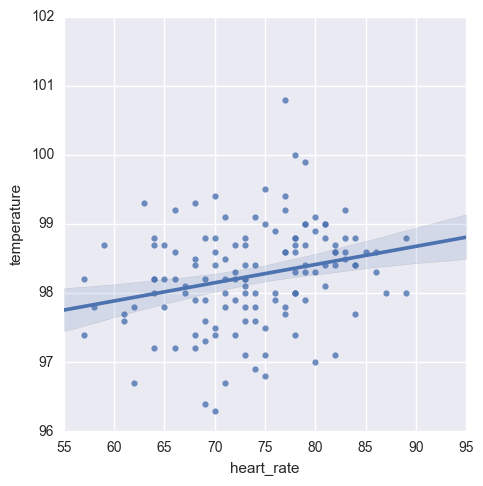

In [15]:
sns.lmplot(y='temperature', x='heart_rate', data=df)  
plt.show()

In [16]:
r2 = stats.pearsonr(df.temperature, df.heart_rate)
p_co = str(r2[0])
p_pval = str(r2[1])
print('The Pearson’s correlation coefficient is ' + p_co)
print('The p-valueis ' + p_pval)

The Pearson’s correlation coefficient is 0.253656402721
The p-valueis 0.00359148925071


## 3. Is the true population mean really 98.6 degrees F?

In [17]:
temp_mean = df.temperature.mean()
print('The mean body temperature from this sample is ' + str(temp_mean))
print('')

The mean body temperature from this sample is 98.2492307692



## Would you use a one-sample or two-sample test? Why?
* _Two-sample test. We are comparing the means between two independent groups._

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [18]:
std_temp = df.temperature.std()
std_temp
abn_neg, abn_post = str(temp_mean + 2*std_temp), str(temp_mean - 2*std_temp)
print('Body temperatures 2 stds from the mean i.e. above ' + abn_neg  +' or below ' + abn_post + 'could be considered abnormal')

Body temperatures 2 stds from the mean i.e. above 99.7155970853 or below 96.7828644532could be considered abnormal


## 5. Is there a significant difference between males and females in normal temperature?

In [19]:
temp_m = df[df['gender'] == 'M']
temp_f = df[df['gender'] == 'F']
print(temp_m.shape)
print(temp_f.shape)

(65, 3)
(65, 3)


In [20]:
ttest_gender = stats.ttest_ind(temp_m.temperature, temp_f.temperature)

print('There is a significant difference for temp by gender, p=' + str(ttest_gender[1]))

There is a significant difference for temp by gender, p=0.0239318831224


## Introduction
The contention that the human core body temperture is a held at steady 98.6F has been a  invioliable medical fact since Carl Wunderlich first published his seminal book "The behavior of the self-warmth in diseases" nearly 120 years. However, several recent publications have called this measure into questions, with some reports finding sex differences in core body temperature. [see Young, Hutchens et al. 2008a, 2008b]. To address ambiguity, this study employed a novel medical imaging technology that allows for non-invasive  deep tissue termal detection (NTD). This study recruited 65 healthy male and 65 healthy female students enrolled at the University of Michigan to assess sex differences in core body tempeture. 

## Results

In [21]:
df.groupby('gender').describe()

heart_rate  temperature
gender                               
F      count   65.000000    65.000000
       mean    74.153846    98.393846
       std      8.105227     0.743488
       min     57.000000    96.400000
       25%     68.000000    98.000000
       50%     76.000000    98.400000
       75%     80.000000    98.800000
       max     89.000000   100.800000
M      count   65.000000    65.000000
       mean    73.369231    98.104615
       std      5.875184     0.698756
       min     58.000000    96.300000
       25%     70.000000    97.600000
       50%     73.000000    98.100000
       75%     78.000000    98.600000
       max     86.000000    99.500000

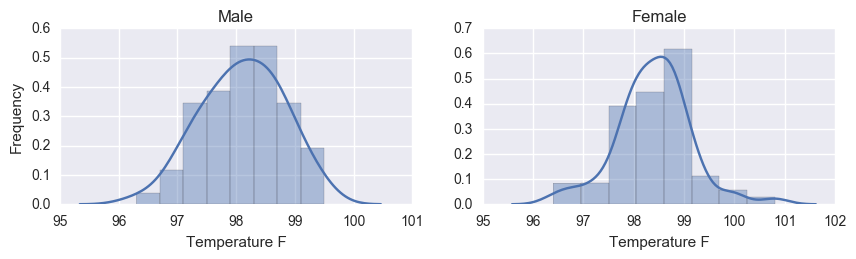

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(221)
sns.distplot(temp_m.temperature, kde=True, bins = 8, rug=False)
plt.title('Male')
plt.xlabel('Temperature F')
plt.ylabel('Frequency')
plt.subplot(222)
sns.distplot(temp_f.temperature, kde=True, bins = 8, rug=False)
plt.title('Female')
plt.xlabel('Temperature F')

plt.show()

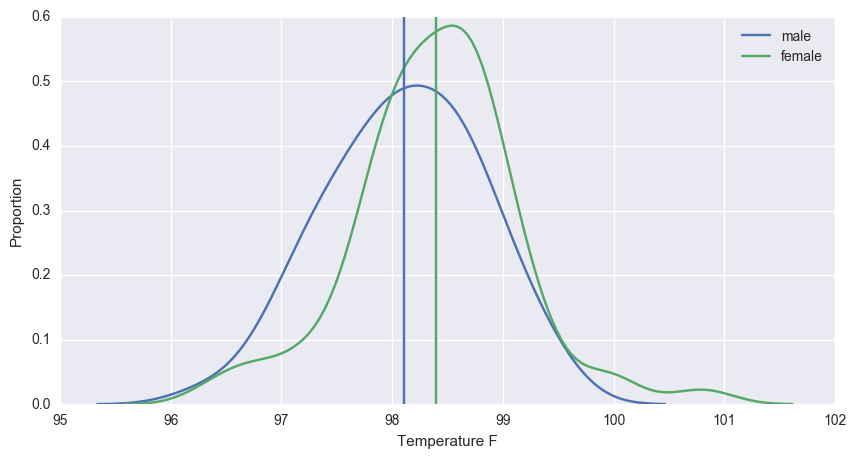

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(111)
sns.distplot(temp_m.temperature, kde=True, bins = 8, hist = False, label = 'male', rug=False)
#plt.title('Male')
plt.xlabel('Temperature F')
plt.ylabel('Proportion')
plt.subplot(111)
sns.distplot(temp_f.temperature, kde=True, bins = 8, hist = False, label = 'female', rug=False)
#plt.title('Female')
plt.xlabel('Temperature F')
plt.axvline(temp_f.temperature.mean(), color="g")
plt.axvline(temp_m.temperature.mean(), color="b")

plt.show()

fig1 = plt.figure(figsize = (10,2.5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
ax1.hist(temp_m.temperature, bins = 10)
ax1.set_xlabel('Males')
ax2.hist(temp_f.temperature, bins = 10)
ax2.set_xlabel('Females')

plt.show()

In [31]:
temp_m_skew = stats.skew(temp_m.temperature)
temp_f_skew = stats.skew(temp_f.temperature)
print(temp_m_skew)
print(temp_f_skew)

-0.20841723176
0.0959069800744


In [25]:
df.groupby('gender').var()

,temperature,heart_rate
gender,,
F,0.552774,65.694712
M,0.488260,34.517788


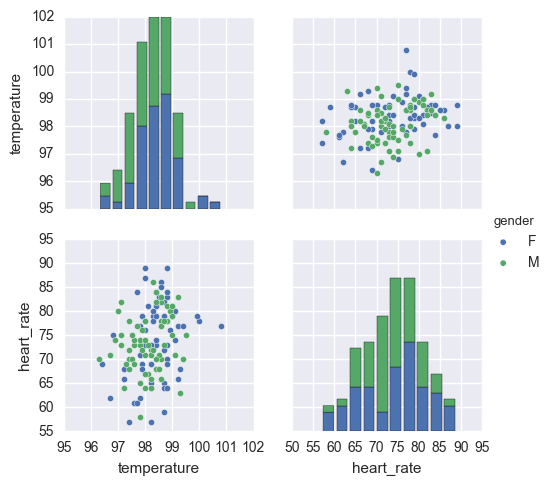

In [26]:
sns.pairplot(df, hue = 'gender')

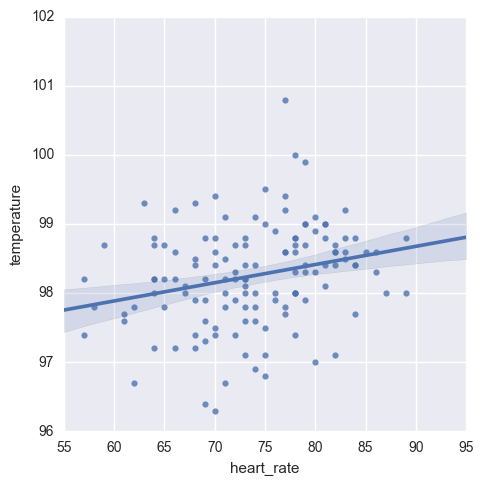

In [27]:
sns.lmplot(y='temperature', x='heart_rate', data=df)  
plt.show()

In [36]:
import statsmodels.formula.api as smf
results = smf.ols('heart_rate ~ temperature', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             heart_rate   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.802
Date:                Thu, 30 Mar 2017   Prob (F-statistic):            0.00359
Time:                        22:29:41   Log-Likelihood:                -433.75
No. Observations:                 130   AIC:                             871.5
Df Residuals:                     128   BIC:                             877.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -166.2847     80.912     -2.055      0.042      -326.384    -6.186
temperature     2.4432      0.824      2.967      0.004         0.814     4.073
==============================================================================
Omnibus:                        1.549   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.541
Skew:                          -0.183   Prob(JB):                        0.463
Kurtosis:                       2.613   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
m = temp_m.temperature.mean()
f = temp_f.temperature.mean()
m_sub_f = m-f

ttest_gender = stats.ttest_ind(temp_m.temperature, temp_f.temperature)

print('Mean male temperature was ' + str(m) +'.' + ' The mean female body temperature was '+ str(f))
print('This sex specific difference in core body temperatre were statistically significant(p=' + str(ttest_gender[1]) + ' Student\'s two-way t-test).')
print('However, the magnitude of this temperature difference appears to  modest, ' + str(m_sub_f ) + ' degrees F.')

Mean male temperature was 98.1046153846. The mean female body temperature was 98.3938461538
This sex specific difference in core body temperatre were statistically significant(p=0.0239318831224 Student's two-way t-test).
However, the magnitude of this temperature difference appears to  modest, -0.289230769231 degrees F.
